# T2 signal simulation and T2 fitting

### Loading juila packages
This cell only needs to run once when you start the kernel & this notebook

In [1]:
using PyPlot

### T2 signals
$ M(t) = M_0 \exp(-\frac{t}{T_2}) $
* T2 = 95 msec --> this is the input of simulation
* t: 0 to 250 msec

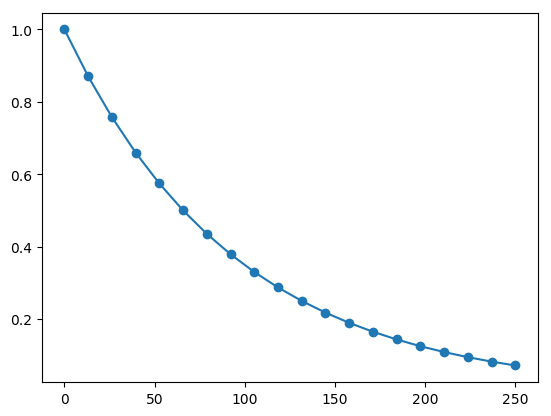

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12df17310>

In [2]:
T2model(t,p) = p[2]*exp.(-t./p[1]);
t = linspace(0,250,20) # 0 to 250 msec
T2 = 95. # msec
M0 = 1.
M = T2model(t,[T2,M0])
figure(1); plot(t,M,"-o")

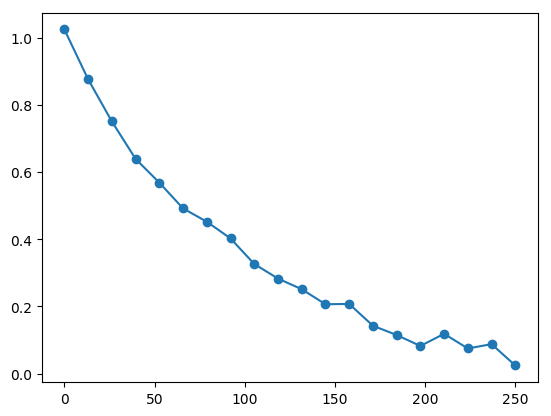

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12e0e0490>

In [3]:
MNoise = M + 0.02*M0*randn(size(t)[1]);
figure(1); plot(t,MNoise,"-o")

### T2 fitting

  0.000385 seconds (95 allocations: 72.406 KiB)


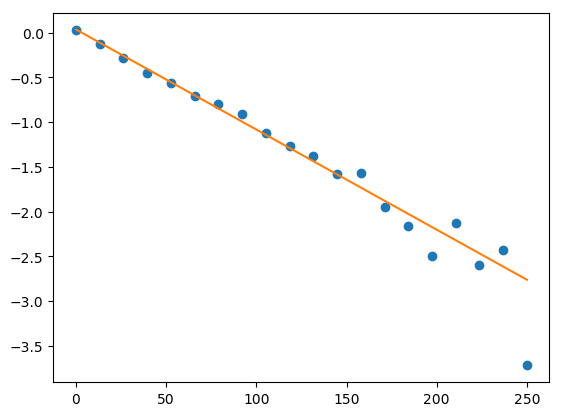

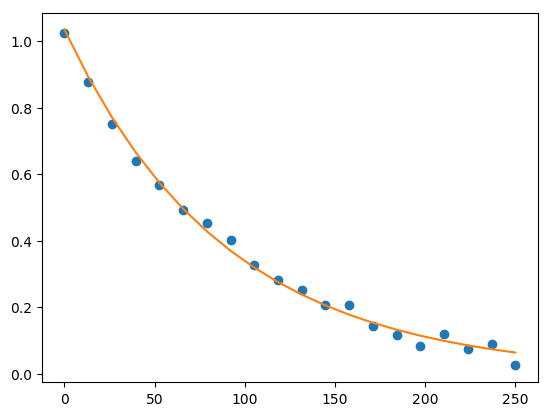

The fitted T2 value is: 89.40890265854411 msec


In [22]:
X = zeros(size(MNoise)[1],2) 
X[:,1] = t;  X[:,2] = 1.0
@time coeff = X[1:end-1,:]\log.(MNoise[1:end-1])
figure(1); plot(t, log.(MNoise),"o"), plot(t, coeff[1]*t + coeff[2]);
fittedT2Value = -1/coeff[1];
figure(2); plot(t, MNoise, "o"), plot(t, exp(coeff[2]).*exp.(-t./fittedT2Value))
println("The fitted T2 value is: ", fittedT2Value, " msec")

### Exponential fitting 

In [24]:
# Pkg.add("LsqFit")
using LsqFit
fit = curve_fit(T2model, t, MNoise, [100,0.5])
fittedParameters = fit.param;
display(fittedParameters[1])

91.56558990903318